# 4.9 Task Part 2 - Intro to Data Visualizations with Python

### Script contents:

#### Importing libraries and data
#### Create histogram for order_hour_of_day
#### Create a bar chart from the “loyalty_flag” column
#### Create line chart of expenditure against hour of the day
#### Create line chart of connection between age and number of dependents
#### Create scatterplot showing connection between age and spending power (income)
#### Export visualizations

## Import libraries and data


#### 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating a string of the path to main project folder

path = '/Users/jarrettpugh/Library/CloudStorage/OneDrive-Personal/Data Analytics/Career Foundry - DA Bootcamp/A4 Python Fundamentals for Data Analysts/Instacart Basket Analysis'

In [4]:
# Import customers_orders_products.pkl as dataframe 'cust_ords_prods'

cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products.pkl'))

In [7]:
cust_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,customer_gender,customer_state,customer_age,date_joined,customer_number_of_dependents,customer_family_status,customer_income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

I have completed this step.

#### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

    -In a markdown cell beneath your histogram, describe what the histogram demonstrates.

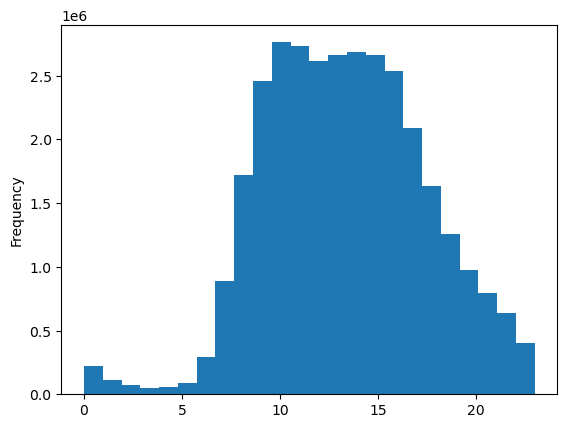

In [11]:
# Create historgram 'histogram_order_hour' of the 'order_hour_of_day' column

histogram_order_hour = cust_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

This histogram represents the frequency of orders during each hour of the day. From the visualization, we know that the hours between 9 and 16 are the busiest. After hour 16, the number of orders per hour decreases incrimintally. The slowest hours occur between 0 (12 AM) and 6.

#### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.


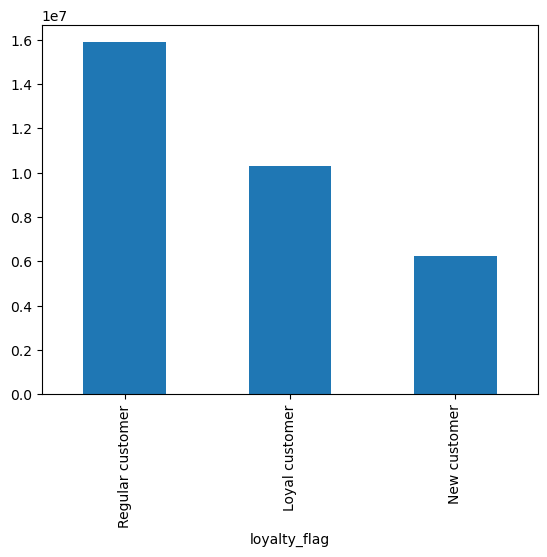

In [12]:
# Create a bar chart from the 'loyalty_flag' column

bar_loyalty = cust_ords_prods['loyalty_flag'].value_counts().plot.bar()

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)


In [13]:
# Set the seed for the random number generator
# Create a list of random floating numbers between 0 and 1 of the length that is equivalent to the length of cust_ords_prods df
# Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7)
# Store the results of the test in a new list, dev, in the form of boolean values (True and False)

np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods)) <= 0.7

In [14]:
dev

array([False,  True, False, ...,  True,  True,  True])

Split dataframe into two samples

In [15]:
# Store 70% of sample in the dataframe big

big = cust_ords_prods[dev]

In [16]:
# Store 30% of sample in the dataframe small

small = cust_ords_prods[~dev]

In [ ]:
# Double check that the length of the 2 dataframes add up together

In [17]:
len(cust_ords_prods)

32404859

In [18]:
len(big) + len(small)

32404859

In [20]:
# Reducing your samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day”

order_hour_prices = small[['order_hour_of_day','prices']]

/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

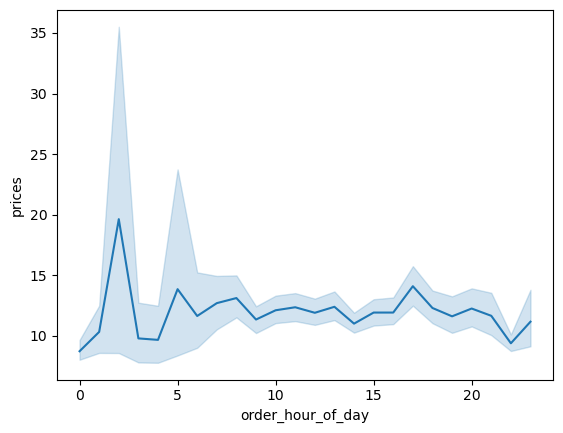

In [21]:
# Make line chart of expenditure against hour of the day

line_hourly_expenditure = sns.lineplot(data = order_hour_prices, x = 'order_hour_of_day',y = 'prices')

#### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

    -In a markdown cell beneath your line chart, describe what the line chart shows.

In [22]:
# Reducing sample df to only those columns necessary for the chart, namely “customer_age” and “customer_number_of_dependents”

age_dependents = small[['customer_age','customer_number_of_dependents']]

/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

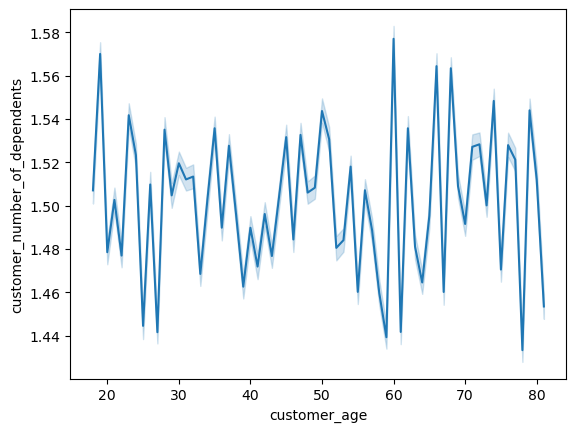

In [23]:
# Make line chart of connection between age and number of dependents

line_age_dependents = sns.lineplot(data = age_dependents, x = 'customer_age',y = 'customer_number_of_dependents')

This line chart displays the relationship between a customer's age and the number of dependents they have. Contrary to what I expected, there does not seem to be a clear positive relationship between customer age and number of dependents. This visualization shows that there actually is quite a bit of oscillation throughout every decade of a customer's life. The average number of dependents for a customer oscillates between 1.43 and 1.58. There appear to be other defining factors in determining a customer's family situation, mainly the number of dependents, other than the customer's age.

#### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
    -In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [34]:
# Reducing  df to only those columns necessary for the scatterplot, namely “customer_age” and “customer_income”

age_income = cust_ords_prods[['customer_age','customer_income']]

In [36]:
# Create dataframe with average customer income grouped by customer age

average_income_by_age = age_income.groupby('customer_age')['customer_income'].mean().reset_index()

/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jarrettpugh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


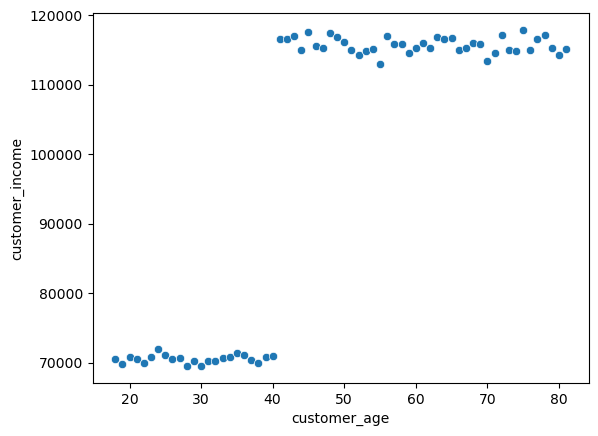

In [37]:
# Create a scatterplot to explore the relationship between a customer's age and spending power (average income)

scatterplot_age_income = sns.scatterplot(data=average_income_by_age, x='customer_age', y='customer_income')

The scatterplot visualizes the relationship between a customer's age and average income. As the visualization shows, the average customer from the age of 18 to 40 has an income of around 70,000. When the customer gets into their early 40s and beyond, customers of that age of average make between 110,000 and 120,000.

#### 8. Export your visualizations as “.png” files in your relevant project folder.

In [38]:
#  Export histogram 'histogram_order_hour' using figure.savefig() function

histogram_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour.png'))

In [39]:
#  Export bar chart 'bar_loyalty' using figure.savefig() function

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [40]:
#  Export line chart 'line_hourly_expenditure' using figure.savefig() function

line_hourly_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hourly_expenditure.png'))

In [41]:
#  Export line chart 'line_age_dependents' using figure.savefig() function

line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

In [42]:
scatterplot_age_income

#  Export line chart 'scatterplot_age_income' using figure.savefig() function

scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))